In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
class LassoRegression:
  def __init__(self, learning_rate, epochs, lambda_parameter):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.lambda_parameter = lambda_parameter

  def fit(self, X, y):
    self.m, self.n = X.shape
    self.X = X
    self.y = y
    self.weights = np.zeros(self.n)
    self.bias = 0

    for epoch in range(self.epochs):
      self.update_weights()

  def update_weights(self):
    y_pred = self.predict(self.X)
    dw = (-2 * ((self.X.T).dot(self.y - y_pred)) + self.lambda_parameter * np.sign(self.weights)) / self.m
    db = (-2 * np.sum(self.y - y_pred)) / self.m

    self.weights -= self.learning_rate * dw
    self.bias -= self.learning_rate * db

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

In [5]:
salary_data = pd.read_csv('/content/salary_data.csv')
# Splitting Features and target variables
X = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, -1].values
# Split the data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
# Training the model
model = LassoRegression(learning_rate=0.01, epochs = 500, lambda_parameter=0.01)
model.fit(X_train, y_train)

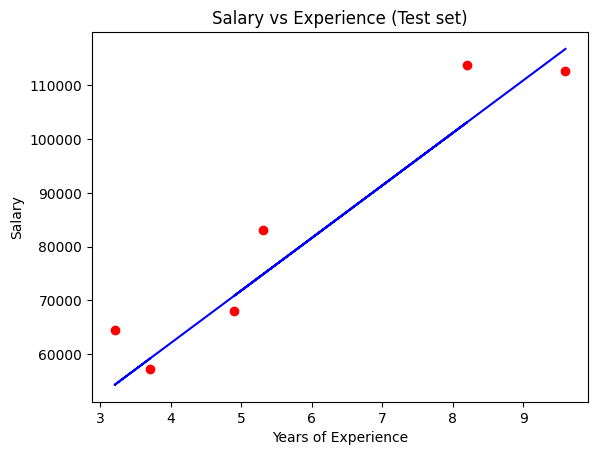

In [7]:
# predict for test data
y_test_pred = model.predict(X_test)

# Plot the predicted values and ground truth
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_test_pred, color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()